## A description of the data and how it will be used to solve the problem. 

In [15]:
#First we need to import the libraries:
import pandas as pd
import numpy as np

### 1. First of all we need to download the data

In [16]:
!wget -O CarAccidents.csv https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv

--2020-09-28 21:42:31--  https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv
Resolving s3.us.cloud-object-storage.appdomain.cloud (s3.us.cloud-object-storage.appdomain.cloud)... 67.228.254.196
Connecting to s3.us.cloud-object-storage.appdomain.cloud (s3.us.cloud-object-storage.appdomain.cloud)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 73917638 (70M) [text/csv]
Saving to: ‘CarAccidents.csv’

100%[======================================>] 73,917,638  41.8MB/s   in 1.7s   

2020-09-28 21:42:33 (41.8 MB/s) - ‘CarAccidents.csv’ saved [73917638/73917638]



### In order to work with the data in Python we need to read the file into the dataframe:

In [17]:
df = pd.read_csv ("CarAccidents.csv", low_memory=False)
df.head()

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


### Check the size of the data:

In [18]:
df.shape

(194673, 38)

### We can check statistical summary for our dataframe:

In [19]:
df.describe(include = 'all')

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
count,194673.000000,189339.000000,189339.000000,194673.000000,194673.000000,194673.000000,194673,194673,192747,65070.000000,...,189661,189503,4667,1.149360e+05,9333,194655,189769,194673.000000,1.946730e+05,194673
unique,NaN,NaN,NaN,NaN,NaN,NaN,194670,2,3,NaN,...,9,9,1,NaN,1,63,62,NaN,NaN,2
top,NaN,NaN,NaN,NaN,NaN,NaN,1776526,Matched,Block,NaN,...,Dry,Daylight,Y,NaN,Y,32,One parked--one moving,NaN,NaN,N
freq,NaN,NaN,NaN,NaN,NaN,NaN,2,189786,126926,NaN,...,124510,116137,4667,NaN,9333,44421,44421,NaN,NaN,187457
mean,1.298901,-122.330518,47.619543,108479.364930,141091.456350,141298.811381,NaN,NaN,NaN,37558.450576,...,NaN,NaN,NaN,7.972521e+06,NaN,NaN,NaN,269.401114,9.782452e+03,NaN
std,0.457778,0.029976,0.056157,62649.722558,86634.402737,86986.542110,NaN,NaN,NaN,51745.990273,...,NaN,NaN,NaN,2.553533e+06,NaN,NaN,NaN,3315.776055,7.226926e+04,NaN
min,1.000000,-122.419091,47.495573,1.000000,1001.000000,1001.000000,NaN,NaN,NaN,23807.000000,...,NaN,NaN,NaN,1.007024e+06,NaN,NaN,NaN,0.000000,0.000000e+00,NaN
25%,1.000000,-122.348673,47.575956,54267.000000,70383.000000,70383.000000,NaN,NaN,NaN,28667.000000,...,NaN,NaN,NaN,6.040015e+06,NaN,NaN,NaN,0.000000,0.000000e+00,NaN
50%,1.000000,-122.330224,47.615369,106912.000000,123363.000000,123363.000000,NaN,NaN,NaN,29973.000000,...,NaN,NaN,NaN,8.023022e+06,NaN,NaN,NaN,0.000000,0.000000e+00,NaN
75%,2.000000,-122.311937,47.663664,162272.000000,203319.000000,203459.000000,NaN,NaN,NaN,33973.000000,...,NaN,NaN,NaN,1.015501e+07,NaN,NaN,NaN,0.000000,0.000000e+00,NaN


### And the data types:

In [20]:
df.dtypes

SEVERITYCODE        int64
X                 float64
Y                 float64
OBJECTID            int64
INCKEY              int64
COLDETKEY           int64
REPORTNO           object
STATUS             object
ADDRTYPE           object
INTKEY            float64
LOCATION           object
EXCEPTRSNCODE      object
EXCEPTRSNDESC      object
SEVERITYCODE.1      int64
SEVERITYDESC       object
COLLISIONTYPE      object
PERSONCOUNT         int64
PEDCOUNT            int64
PEDCYLCOUNT         int64
VEHCOUNT            int64
INCDATE            object
INCDTTM            object
JUNCTIONTYPE       object
SDOT_COLCODE        int64
SDOT_COLDESC       object
INATTENTIONIND     object
UNDERINFL          object
WEATHER            object
ROADCOND           object
LIGHTCOND          object
PEDROWNOTGRNT      object
SDOTCOLNUM        float64
SPEEDING           object
ST_COLCODE         object
ST_COLDESC         object
SEGLANEKEY          int64
CROSSWALKKEY        int64
HITPARKEDCAR       object
dtype: objec

### We can count missing values in each column:

In [21]:
missing_data=df.isnull()
for column in missing_data.columns.values.tolist():
    print(column)
    print(missing_data[column].value_counts())
    print(" ")

SEVERITYCODE
False    194673
Name: SEVERITYCODE, dtype: int64
 
X
False    189339
True       5334
Name: X, dtype: int64
 
Y
False    189339
True       5334
Name: Y, dtype: int64
 
OBJECTID
False    194673
Name: OBJECTID, dtype: int64
 
INCKEY
False    194673
Name: INCKEY, dtype: int64
 
COLDETKEY
False    194673
Name: COLDETKEY, dtype: int64
 
REPORTNO
False    194673
Name: REPORTNO, dtype: int64
 
STATUS
False    194673
Name: STATUS, dtype: int64
 
ADDRTYPE
False    192747
True       1926
Name: ADDRTYPE, dtype: int64
 
INTKEY
True     129603
False     65070
Name: INTKEY, dtype: int64
 
LOCATION
False    191996
True       2677
Name: LOCATION, dtype: int64
 
EXCEPTRSNCODE
True     109862
False     84811
Name: EXCEPTRSNCODE, dtype: int64
 
EXCEPTRSNDESC
True     189035
False      5638
Name: EXCEPTRSNDESC, dtype: int64
 
SEVERITYCODE.1
False    194673
Name: SEVERITYCODE.1, dtype: int64
 
SEVERITYDESC
False    194673
Name: SEVERITYDESC, dtype: int64
 
COLLISIONTYPE
False    189769
True    

In [22]:
#drop rows with missing values:
df.dropna(subset = ["ROADCOND", "LIGHTCOND"], axis=0, inplace=True)

#### We can plot the data from the columns that provide the most value for our research: 
1. SEVERITYCODE will show us proportion on collisions resulted in injures and not.
2. ROADCOND will show us which road conditions resulted in collisions.
3. LIGHTCOND will show us which light conditions resulted in collisions.
4. WEATHER will shos us the weather in time of crash.
5. INATTENTIONIND tells us whether the crash happened due to inattention from the driver.
6. UNDERINFL feature shows us whether the driver was under influence in time of collision.

#### I would like to represent these features using subplots. Let's create 6 subplots within a figure. 

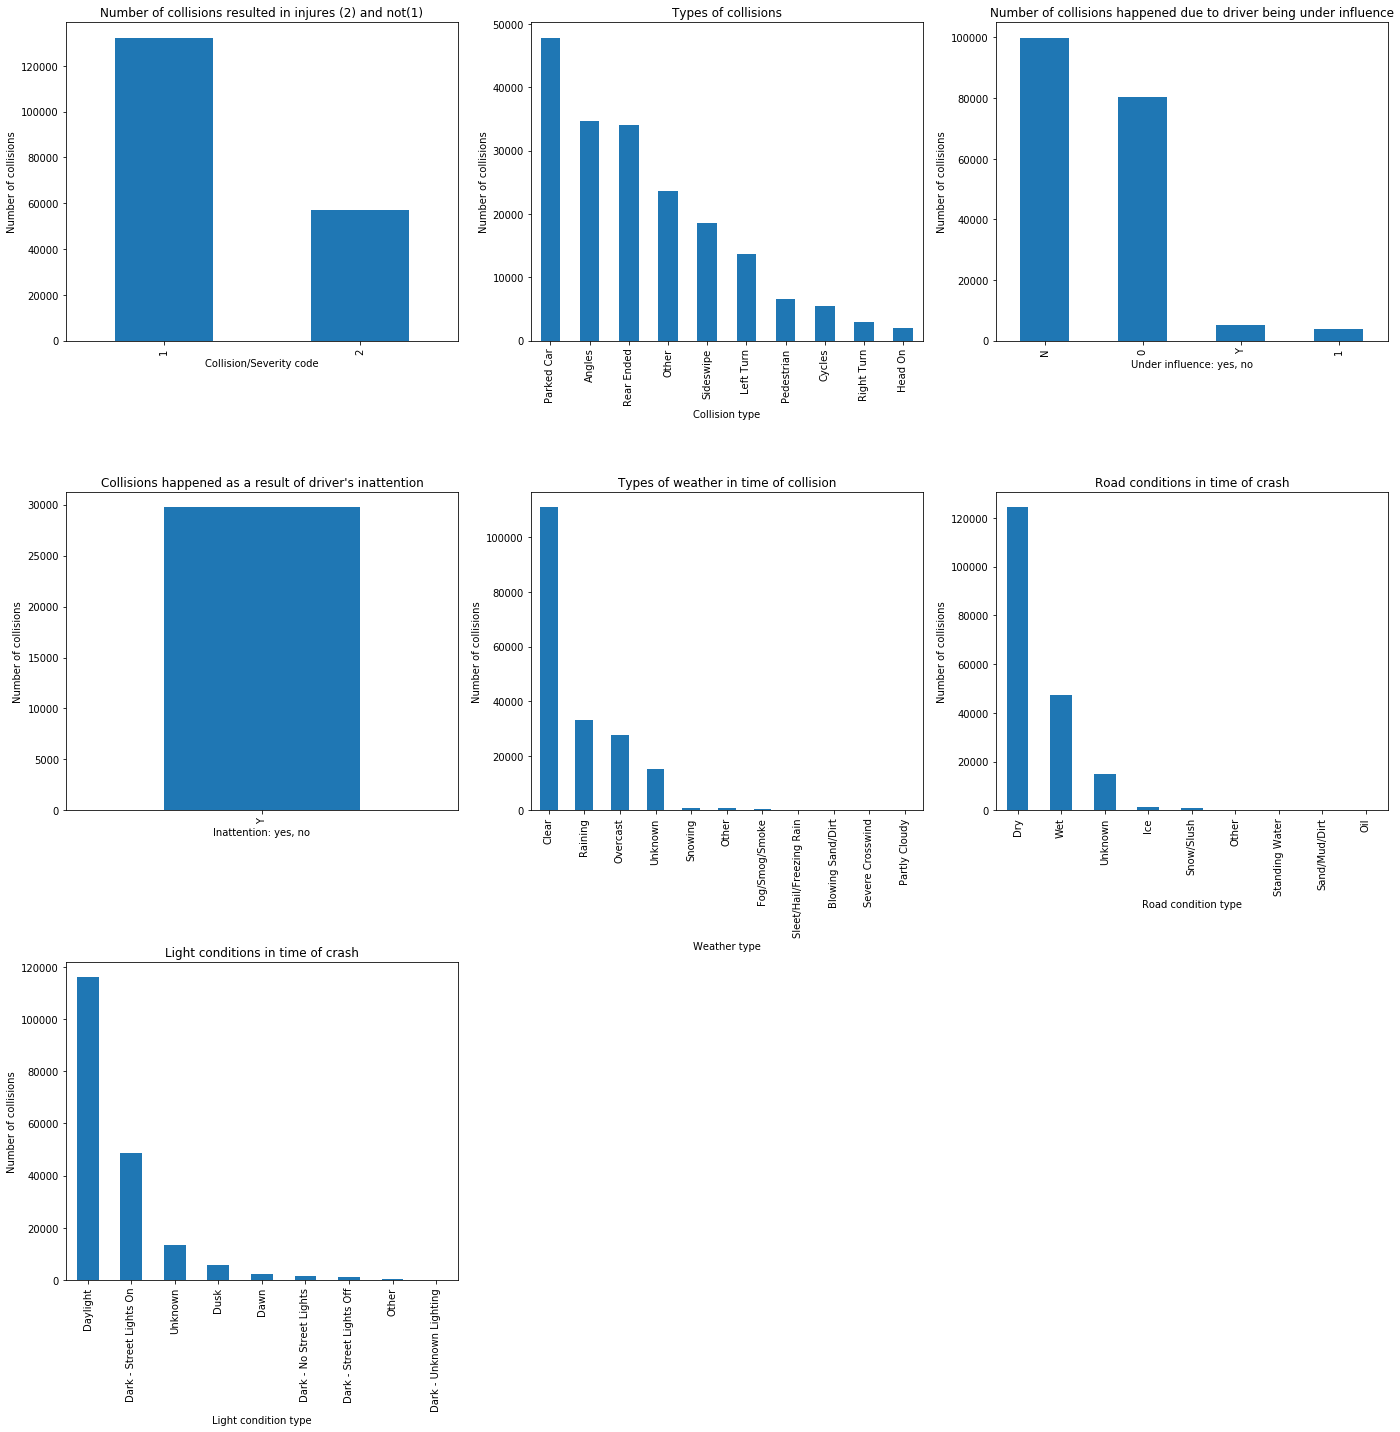

In [24]:
import matplotlib as mpl
import matplotlib.pyplot as plt

fig=plt.figure()
ax0=fig.add_subplot(3,3,1)
ax1=fig.add_subplot(3,3,2)
ax2=fig.add_subplot(3,3,3)
ax3=fig.add_subplot(3,3,4)
ax4=fig.add_subplot(3,3,5)
ax5=fig.add_subplot(3,3,6)
ax6=fig.add_subplot(3,3,7)

#subplot 1: bar plot
df['SEVERITYCODE'].value_counts().plot(kind='bar', y='SEVERITYCODE', figsize=(20, 30), ax=ax0)
ax0.set_title('Number of collisions resulted in injures (2) and not(1)')
ax0.set_xlabel('Collision/Severity code')
ax0.set_ylabel('Number of collisions')

#subplot 2: bar plot
df['COLLISIONTYPE'].value_counts().plot(kind='bar', figsize=(20, 30), ax=ax1)
ax1.set_title('Types of collisions')
ax1.set_xlabel('Collision type')
ax1.set_ylabel('Number of collisions')

#subplot 3: bar plot
df['UNDERINFL'].value_counts().plot(kind='bar', figsize=(20, 20), ax=ax2)
ax2.set_title('Number of collisions happened due to driver being under influence')
ax2.set_xlabel('Under influence: yes, no')
ax2.set_ylabel('Number of collisions')

#subplot 4: bar plot
df['INATTENTIONIND'].value_counts().plot(kind='bar', figsize=(20, 20), ax=ax3)
ax3.set_title("Collisions happened as a result of driver's inattention")
ax3.set_xlabel('Inattention: yes, no')
ax3.set_ylabel('Number of collisions')

#subplot 5: bar plot
df['WEATHER'].value_counts().plot(kind='bar', figsize=(20, 30), ax=ax4)
ax4.set_title('Types of weather in time of collision')
ax4.set_xlabel('Weather type')
ax4.set_ylabel('Number of collisions')

#subplot 6: bar plot
df['ROADCOND'].value_counts().plot(kind='bar', figsize=(20, 20), ax=ax5)
ax5.set_title('Road conditions in time of crash')
ax5.set_xlabel('Road condition type')
ax5.set_ylabel('Number of collisions')

#subplot 7: bar plot
df['LIGHTCOND'].value_counts().plot(kind='bar', figsize=(20, 20), ax=ax6)
ax6.set_title('Light conditions in time of crash')
ax6.set_xlabel('Light condition type')
ax6.set_ylabel('Number of collisions')

plt.tight_layout()
plt.show()

From the graphs I can see that the most crashes happened during the day with clear weather on the dry roads. Luckily most of them brought only car damage and no injury. Most of the crashes happened due to inattention of the driver not being under influence. This suggest that drivers should be more attentive during regular conditions. 